In [2]:
%matplotlib inline

In [43]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [4]:
resp = pd.read_csv('sampleData/run1/1484601268080.txt', header=None)
resp.columns = ['time', 'resp', 'tone']

In [31]:
bci = pd.read_csv('sampleData/run1/OpenBCI-RAW-2017-01-16_16-12-31-oddball.txt', sep=', ', skiprows=4, header=None)
chan_columns = [str(i) for i in range(1,9)]
bci.columns = ['tix'] + chan_columns + ['a', 'b', 'c', 'time']

/home/mike/ve/erp/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [6]:
resp.sort_values('time', inplace=True)

In [7]:
t0 = bci.loc[0, 'time'] 
tmid_bci = bci.loc[len(bci) // 2, 'time']
tmid_resp = resp.loc[len(resp) // 2, 'time']
delta_t = tmid_resp-tmid_bci
print(tmid_bci, tmid_resp, delta_t, t0)

resp['time'] += tmid_bci-tmid_resp # stupid hack to get the times to line up right
resp['time'] -= t0 
bci['time'] -= t0

1.48460121965e+12 1484601256426 36776.0 1.48460116664e+12


In [8]:
tonef = resp['tone'].replace({'C4':1, 'C5':2, 'C3': 0})
resp['tonef'] = pd.Series(tonef, dtype='float64')
# resp['tonef'].dtype

In [9]:
resp.dtypes

time     float64
resp       int64
tone      object
tonef    float64
dtype: object

In [10]:
resp

,time,resp,tone,tonef
0,-236582.0,0,C5,2.0
1,-235082.0,0,C4,1.0
2,-233582.0,0,C4,1.0
3,-232082.0,0,C4,1.0
4,-230582.0,0,C4,1.0
5,-229082.0,0,C5,2.0
6,-227582.0,0,C4,1.0
7,-226082.0,0,C4,1.0
8,-224582.0,0,C4,1.0
9,-223082.0,0,C4,1.0


In [11]:
len(bci)

26492

In [12]:
resp['time'] = pd.Series(resp['time'], dtype='int64') # Converting to int to allow for indexing safely
bci['time'] = pd.Series(bci['time'], dtype='int64')

In [13]:
bci

,tix,1,2,3,4,5,6,7,8,a,b,c,time
0,0,65908.52,-60502.75,18753.72,-59711.32,14425.12,-59723.81,7026.90,163415.34,0.01,-0.02,1.04,0
1,1,65885.30,-60182.50,18726.98,-59706.56,14396.18,-59617.51,6997.95,163411.45,0.00,0.00,0.00,4
2,2,65868.48,-59552.22,18706.76,-59696.95,14383.55,-59398.33,6982.93,163407.78,0.00,0.00,0.00,9
3,3,65887.27,-59397.10,18729.62,-59701.13,14406.44,-59497.21,7008.08,163401.73,0.00,0.00,0.00,13
4,4,65899.29,-59907.30,18741.24,-59714.11,14422.69,-59732.11,7026.11,163394.59,0.00,0.00,0.00,17
5,5,65880.67,-60146.84,18719.29,-59710.71,14401.36,-59654.68,7004.39,163389.61,0.00,0.00,0.00,19
6,6,65859.93,-60248.99,18698.73,-59697.75,14381.47,-59378.84,6987.02,163385.92,0.00,0.00,0.00,24
7,7,65879.38,-60861.23,18724.50,-59697.98,14402.44,-59415.70,7005.62,163379.33,0.01,-0.02,1.04,28
8,8,65904.52,-61150.82,18745.24,-59709.55,14424.14,-59689.53,7026.52,163371.67,0.00,0.00,0.00,31
9,9,65882.75,-60967.60,18720.61,-59714.96,14403.64,-59720.08,7006.42,163367.47,0.00,0.00,0.00,36


In [14]:
mid = len(bci) // 2
bci2 = bci.iloc[mid-100:mid+100]

In [15]:
# bci2.merge(resp, 'outer', on='time', sort=True)

In [16]:
# bci.merge(resp, 'outer', on='time', sort=True).to_csv('testmerge.csv')
mframe = pd.merge_asof(bci, resp, on='time', allow_exact_matches=False)

In [17]:
mframe

,tix,1,2,3,4,5,6,7,8,a,b,c,time,resp,tone,tonef
0,0,65908.52,-60502.75,18753.72,-59711.32,14425.12,-59723.81,7026.90,163415.34,0.01,-0.02,1.04,0,2,0,0.0
1,1,65885.30,-60182.50,18726.98,-59706.56,14396.18,-59617.51,6997.95,163411.45,0.00,0.00,0.00,4,2,0,0.0
2,2,65868.48,-59552.22,18706.76,-59696.95,14383.55,-59398.33,6982.93,163407.78,0.00,0.00,0.00,9,2,0,0.0
3,3,65887.27,-59397.10,18729.62,-59701.13,14406.44,-59497.21,7008.08,163401.73,0.00,0.00,0.00,13,2,0,0.0
4,4,65899.29,-59907.30,18741.24,-59714.11,14422.69,-59732.11,7026.11,163394.59,0.00,0.00,0.00,17,2,0,0.0
5,5,65880.67,-60146.84,18719.29,-59710.71,14401.36,-59654.68,7004.39,163389.61,0.00,0.00,0.00,19,2,0,0.0
6,6,65859.93,-60248.99,18698.73,-59697.75,14381.47,-59378.84,6987.02,163385.92,0.00,0.00,0.00,24,2,0,0.0
7,7,65879.38,-60861.23,18724.50,-59697.98,14402.44,-59415.70,7005.62,163379.33,0.01,-0.02,1.04,28,2,0,0.0
8,8,65904.52,-61150.82,18745.24,-59709.55,14424.14,-59689.53,7026.52,163371.67,0.00,0.00,0.00,31,2,0,0.0
9,9,65882.75,-60967.60,18720.61,-59714.96,14403.64,-59720.08,7006.42,163367.47,0.00,0.00,0.00,36,2,0,0.0


In [18]:
mframe['dtone'] = mframe['tonef'].diff().fillna(0)
mframe['oddball'] = mframe['dtone'] == 2
mframe.drop(['a', 'b', 'c', 'dtone'], axis=1, inplace=True)

In [19]:
mframe.to_csv('testmerge.csv')
print(mframe.shape, bci.shape)

(26492, 14) (26492, 13)


In [20]:
resp['tone'].dtype

dtype('O')

In [21]:
import os
orig = os.getcwd()

In [27]:
erp_index = mframe[mframe['oddball']].index
for el in erp_index:
    print(el)

1987
2738
4990
5740
7617
8368
10244
12121
13997
15123


In [48]:
sampleRate = 250 # Hz
erpTime = 1000 # sec
erp_window = 1000 # ms

In [49]:
mframe.iloc[erp_index[0]:erp_index[0]+erp_window]

,tix,1,2,3,4,5,6,7,8,time,resp,tone,tonef,oddball
1987,161,32920.27,0.0,18622.11,-27635.79,14320.90,0.0,6911.16,0.0,8015,0,C5,2.0,True
1988,162,32910.57,0.0,18633.84,-27625.41,14328.23,0.0,6918.98,0.0,8020,0,C5,2.0,False
1989,163,32858.29,0.0,18606.35,-27575.21,14299.33,0.0,6889.57,0.0,8024,0,C5,2.0,False
1990,164,32801.56,0.0,18603.09,-27519.04,14292.17,0.0,6881.36,0.0,8028,0,C5,2.0,False
1991,165,32786.63,0.0,18627.14,-27501.76,14319.44,0.0,6910.62,0.0,8032,0,C5,2.0,False
1992,166,32779.79,0.0,18629.15,-27494.21,14328.63,0.0,6918.45,0.0,8035,0,C5,2.0,False
1993,167,32734.58,0.0,18602.78,-27451.43,14307.37,0.0,6896.45,0.0,8039,0,C5,2.0,False
1994,168,32675.12,0.0,18595.51,-27393.00,14291.91,0.0,6884.72,0.0,8055,0,C5,2.0,False
1995,169,32652.46,0.0,18620.41,-27368.30,14310.23,0.0,6904.07,0.0,8055,0,C5,2.0,False
1996,170,32649.84,0.0,18630.58,-27364.30,14327.22,0.0,6922.51,0.0,8056,0,C5,2.0,False


In [50]:
erps = []
for idx in erp_index:
    erps.append(mframe[chan_columns].iloc[idx:idx+erp_window])

In [51]:
erps[0].as_matrix()

array([[ 32920.27,      0.  ,  18622.11, ...,      0.  ,   6911.16,      0.  ],
       [ 32910.57,      0.  ,  18633.84, ...,      0.  ,   6918.98,      0.  ],
       [ 32858.29,      0.  ,  18606.35, ...,      0.  ,   6889.57,      0.  ],
       ..., 
       [ 19673.85,      0.  ,  15853.11, ...,      0.  ,   6816.03,      0.  ],
       [ 19685.02,      0.  ,  15864.11, ...,      0.  ,   6815.18,      0.  ],
       [ 19652.86,      0.  ,  15832.39, ...,      0.  ,   6786.19,      0.  ]])

In [73]:
meta_frame = np.zeros((len(erps), erps[0].shape[0], erps[1].shape[1]))
meta_frame.shape

(10, 1000, 8)

In [74]:
for i, item in enumerate(erps):
    meta_frame[i] = np.array(item)

In [75]:
meta_frame.shape

(10, 1000, 8)

In [76]:
erp_mean = meta_frame.mean(axis=0)
erp_mean.shape

(1000, 8)

In [78]:
erp_mean.mean(axis=1).shape

(1000,)

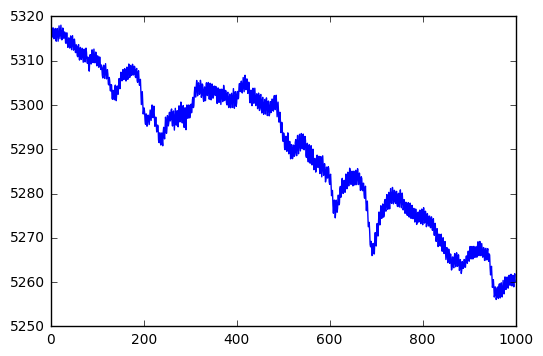

In [80]:
p300 = erp_mean.mean(axis=1)
plt.plot(p300)